In [4]:
data_path = "C:\\Users\\Turan\\Desktop\\DerinOgrenme\\GarbageDataset\\Garbage classification\Garbage classification"
data_path #Dosya yolu

'C:\\Users\\Turan\\Desktop\\DerinOgrenme\\GarbageDataset\\Garbage classification\\Garbage classification'

In [5]:
import os 
os.listdir(os.path.join(os.getcwd(),data_path))#Etiketleri okuma

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [6]:
batch_size=20

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# Verilerin Ayrılması
train=ImageDataGenerator(horizontal_flip=True, 
                         vertical_flip=True, 
                         rescale=1./255, 
                         shear_range = 0.1, 
                         zoom_range = 0.1, 
                         width_shift_range = 0.1, 
                         height_shift_range = 0.1,
                         validation_split=0.1)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [8]:
#Verilerin etiketlenmesi
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [9]:
from tensorflow.keras import layers#Katman işlemlerinin yapılmasını sağlar.
from tensorflow.keras import models#Model işlemlerinin yapılmasını sağlar.
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
#Konvolüsyon,Flatten(Düzleştirme),Havuzlama(MAX),Dropout ve Normal katmanların kullanımını sağlar.

model = models.Sequential() #Boş bir model oluşturuldu.
   
model.add(Conv2D(32,(3,3), #Filtre 3x3
                 padding='same', #Doldurma işlemi sonucu boyutu değiştirmez.
                 input_shape=(512,384,3),#Görüntünün giriş boyutu ve kanal sayısı(512x384,3)
                 activation='relu'))#Aktivasyon fonksiyonu

model.add(MaxPooling2D(pool_size=(2,2))) #Havuzlama katmanı, 2x2'lik filtre uygulanır.

model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(238,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())#Düzleştirme katmanı, veriyi tek bir vektör haline getirir.

#Tam bağlı katman
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))#Çıkış katmanı, ikiden fazla sınıf olduğunda genelde softmax kullanılır.
#Son katmandaki nöron sayısı istenilen sınıflandırma sayısına eşit olmalıdır.

model.summary()#Modelin yapısını ekrana yazdırır.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 384, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 192, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 96, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 96, 238)      137326    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 48, 238)       0         
_________________________________________________________________
flatten (Flatten)            (None, 731136)            0

In [10]:
from tensorflow.keras import optimizers #Optimizasyon fonksiyonlarının bulunduğu kütüphane.

model.compile(#Modelin derlendiği bölüm.
    loss='categorical_crossentropy', #Kayıp fonksiyonu
    optimizer='adam', #Optimizyon fonksiyonu
    metrics=['accuracy']) #Doğruluk ölçütü-değeri

In [11]:
model_path="garbage_cnn" 

In [12]:
num_epochs = 100 #İterasyon sayısı
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [13]:
history = model.fit_generator(
    train_generator, #X_train, öğrenme verisi
    epochs=num_epochs, #İterasyon sayısı
    steps_per_epoch=step_size_train,#Bi seferde verilecek veri sayısı
    validation_data=test_generator,#Doğrulama verisi
    validation_steps=step_size_test)

C:\Users\Turan\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
113/113 [==============================] - 146s 1s/step - loss: 5.1668 - accuracy: 0.1913 - val_loss: 1.6936 - val_accuracy: 0.2458
Epoch 2/100
113/113 [==============================] - 269s 2s/step - loss: 1.6932 - accuracy: 0.2619 - val_loss: 1.6250 - val_accuracy: 0.4208
Epoch 3/100
113/113 [==============================] - 299s 3s/step - loss: 1.6179 - accuracy: 0.3159 - val_loss: 1.5539 - val_accuracy: 0.3292
Epoch 4/100
113/113 [==============================] - 318s 3s/step - loss: 1.5413 - accuracy: 0.3394 - val_loss: 1.4903 - val_accuracy: 0.3833
Epoch 5/100
113/113 [==============================] - 86s 760ms/step - loss: 1.5439 - accuracy: 0.3559 - val_loss: 1.4671 - val_accuracy: 0.4083
Epoch 6/100
113/113 [==============================] - 90s 793ms/step - loss: 1.4961 - accuracy: 0.4064 - val_loss: 1.4065 - val_accuracy: 0.4250
Epoch 7/100
113/113 [==============================] - 85s 753ms/step - loss: 1.4382 - accuracy: 0.3826 - val_loss: 1.3936 - val_acc

Epoch 57/100
113/113 [==============================] - 86s 756ms/step - loss: 0.8812 - accuracy: 0.6565 - val_loss: 0.8753 - val_accuracy: 0.6500
Epoch 58/100
113/113 [==============================] - 85s 750ms/step - loss: 0.9055 - accuracy: 0.6540 - val_loss: 0.8598 - val_accuracy: 0.6792
Epoch 59/100
113/113 [==============================] - 85s 751ms/step - loss: 0.9096 - accuracy: 0.6577 - val_loss: 0.9496 - val_accuracy: 0.6417
Epoch 60/100
113/113 [==============================] - 85s 751ms/step - loss: 0.8797 - accuracy: 0.6958 - val_loss: 0.9514 - val_accuracy: 0.6292
Epoch 61/100
113/113 [==============================] - 88s 779ms/step - loss: 0.8589 - accuracy: 0.6778 - val_loss: 0.9136 - val_accuracy: 0.6667
Epoch 62/100
113/113 [==============================] - 85s 753ms/step - loss: 0.8672 - accuracy: 0.6704 - val_loss: 0.8357 - val_accuracy: 0.6958
Epoch 63/100
113/113 [==============================] - 85s 752ms/step - loss: 0.8522 - accuracy: 0.6857 - val_loss: 0

In [17]:
model.save('garbage_classifier.h5')#Model kaydedilir.

In [18]:
keys=history.history.keys() #Eğitim sürecinde oluşan değerler, tablolamada kullanılacak.
print(keys)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


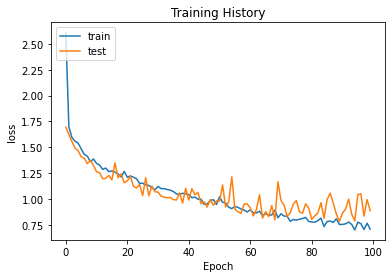

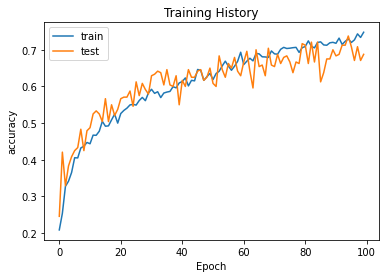

In [19]:
#Eğitim sürecinin görselleştirilmesi
import matplotlib.pyplot as plt

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')